In [58]:
from lab6.pywnxml import WNQuery
from lab6.pywnxml.wnxmlconsole import write_synset, write_synset_id
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
wn = WNQuery.WNQuery('lab6/plwordnet/plwordnet.xml', open(os.devnull, "w"))

In [3]:
szkoda_meaning = wn.lookUpLiteral('szkoda', 'n')
for i in szkoda_meaning:
    write_synset(i, sys.stdout)

PLWN-00003675-n  {strata:1, utrata:1, szkoda:2, uszczerbek:1}  ()  hello
PLWN-00006533-n  {szkoda:1}  (brak danych) ziemia w gospodarstwie zniszczona przez zwierzęta hello


In [ ]:
synsets = wn.lookUpLiteral('wypadek drogowy', 'n')
for el in synsets:
    write_synset(el, sys.stdout)

In [45]:
synsets = {'PLWN-00410902-n'}

while len(synsets) > 0:
    synset_id = synsets.pop()
    synset = wn.lookUpID(synset_id, 'n')
    write_synset_id(wn, synset.wnid, 'n', sys.stdout)
    ids = wn.lookUpRelation(synset.wnid, 'n', 'hypernym')
    if ids:
        for i in ids:
            synsets.add(i)
            print("  ", end="", file=sys.stdout)
            write_synset_id(wn, i, 'n', sys.stdout)
    print("", file=sys.stdout)

PLWN-00410902-n  {wypadek drogowy:1}  ()  hello
  PLWN-00410901-n  {wypadek komunikacyjny:1}  ()  hello

PLWN-00410901-n  {wypadek komunikacyjny:1}  ()  hello
  PLWN-00003982-n  {wypadek:1}  ()  hello

PLWN-00003982-n  {wypadek:1}  ()  hello
  PLWN-00027419-n  {zdarzenie oceniane negatywnie:1}  (brak danych) brak danych hello

PLWN-00027419-n  {zdarzenie oceniane negatywnie:1}  (brak danych) brak danych hello
  PLWN-00006526-n  {wydarzenie:1, wypadek:3, zdarzenie:2, historia:3}  ()  hello

PLWN-00006526-n  {wydarzenie:1, wypadek:3, zdarzenie:2, historia:3}  ()  hello



In [46]:
synset = wn.lookUpSense('wypadek', 1, 'n')
write_synset(synset, sys.stdout)

PLWN-00003982-n  {wypadek:1}  ()  hello


In [39]:
synset = wn.lookUpID('PLWN-00003982-n', 'n')
first_order_ids = set()
write_synset_id(wn, synset.wnid, 'n', sys.stdout)
ids = wn.lookUpRelation(synset.wnid, 'n', 'hyponym')
if ids:
    for i in ids:
        first_order_ids.add(i)
        print("  ", end="", file=sys.stdout)
        write_synset_id(wn, i, 'n', sys.stdout)
print("", file=sys.stdout)

PLWN-00003982-n  {wypadek:1}  ()  hello
  PLWN-00001284-n  {zderzenie:2, kraksa:1}  ()  hello
  PLWN-00006486-n  {kolizja:2}  ()  hello
  PLWN-00016131-n  {karambol:1}  ()  hello
  PLWN-00034688-n  {zawał:2}  ()  hello
  PLWN-00034689-n  {tąpnięcie:1}  ()  hello
  PLWN-00241026-n  {kapotaż:1}  ()  hello
  PLWN-00258639-n  {wykolejenie:2}  ()  hello
  PLWN-00389170-n  {zakrztuszenie:1, zachłyśnięcie:1, aspiracja:3}  ()  hello
  PLWN-00410901-n  {wypadek komunikacyjny:1}  ()  hello
  PLWN-00411618-n  {katastrofa budowlana:1}  ()  hello
  PLWN-00436137-n  {wypadek jądrowy:1}  ()  hello



In [40]:
for synset_id in first_order_ids:
    synset = wn.lookUpID(synset_id, 'n')
    write_synset_id(wn, synset.wnid, 'n', sys.stdout)
    ids = wn.lookUpRelation(synset.wnid, 'n', 'hyponym')
    if ids:
        for i in ids:
            print("  ", end="", file=sys.stdout)
            write_synset_id(wn, i, 'n', sys.stdout)
    print("", file=sys.stdout)

PLWN-00241026-n  {kapotaż:1}  ()  hello

PLWN-00034688-n  {zawał:2}  ()  hello
  PLWN-00037295-n  {obwał:1}  ()  hello

PLWN-00016131-n  {karambol:1}  ()  hello

PLWN-00034689-n  {tąpnięcie:1}  ()  hello

PLWN-00436137-n  {wypadek jądrowy:1}  ()  hello

PLWN-00411618-n  {katastrofa budowlana:1}  ()  hello

PLWN-00001284-n  {zderzenie:2, kraksa:1}  ()  hello
  PLWN-00235346-n  {czołówka:9, zderzenie czołowe:1}  ()  hello
  PLWN-00471555-n  {stłuczka:1}  ()  hello

PLWN-00258639-n  {wykolejenie:2}  ()  hello

PLWN-00006486-n  {kolizja:2}  ()  hello
  PLWN-00441365-n  {kolizja drogowa:1}  ()  hello

PLWN-00410901-n  {wypadek komunikacyjny:1}  ()  hello
  PLWN-00410902-n  {wypadek drogowy:1}  ()  hello

PLWN-00389170-n  {zakrztuszenie:1, zachłyśnięcie:1, aspiracja:3}  ()  hello



In [145]:



def plot_relations(synsets):
#     relations = {"hypernym","holo_member","holo_part","holo_portion","region_domain","usage_domain","category_domain",
#                  "near_antonym","middle","verb_group","similar_to","also_see","be_in_state","eng_derivative",
#                  "is_consequent_state_of","is_preparatory_phase_of","is_telos_of","subevent","causes"}
    
    relations = {"hyponym","mero_member","mero_part","mero_portion","region_member","usage_member","category_member","near_antonym","middle","verb_group","similar_to","also_see","be_in_state","eng_derivative","has_consequent_state","has_preparatory_phase","has_telos","has_subevent","caused_by"}
    G = nx.DiGraph()
    labels={}
    for synset in synsets:
        labels[synset.wnid] = "\n".join([syn.literal.replace(" ", "\n") for syn in synset.synonyms])
        G.add_node(synset.wnid)


    for synset1 in synsets:
        for synset2 in synsets:
            if synset1.wnid != synset2.wnid:
                for relation in relations:
                    found = wn.isIDConnectedWith(synset1.wnid, synset1.pos, relation, synset2.wnid)
                    if found:
                        G.add_edge(synset1.wnid, synset2.wnid, r=relation)

    edge_labels = nx.get_edge_attributes(G,'r')
    pos = nx.circular_layout(G)
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
    nx.draw_networkx_edges(G, pos, width=2)
    nx.draw(G, pos, with_labels=True, font_weight=0.01, labels=labels)
    plt.savefig('pkt5.png')



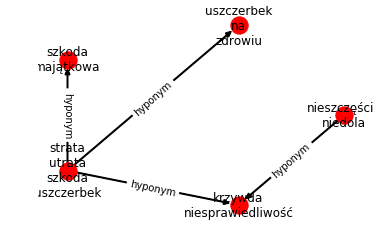

In [146]:
synsets = { wn.lookUpSense(word[0], word[1], word[2]) for word in [('szkoda', 2, 'n'), 
                                                          ('strata', 1, 'n'), 
                                                          ('uszczerbek', 1, 'n'), 
                                                          ('szkoda majątkowa', 1, 'n'), 
                                                          ('uszczerbek na zdrowiu', 1, 'n'), 
                                                          ('krzywda', 1, 'n'), 
                                                          ('niesprawiedliwość', 1, 'n'), 
                                                          ('nieszczęście', 2, 'n')
                                                       ]}
plot_relations(synsets)

PLWN-00418091-a  {wolny:13}  ()  hello
PLWN-00410901-n  {wypadek komunikacyjny:1}  ()  hello
PLWN-00411618-n  {katastrofa budowlana:1}  ()  hello
PLWN-00006486-n  {kolizja:2}  ()  hello
PLWN-00441365-n  {kolizja drogowa:1}  ()  hello
PLWN-00001284-n  {zderzenie:2, kraksa:1}  ()  hello
PLWN-00228740-a  {bezkolizyjny:2}  ()  hello
PLWN-00410902-n  {wypadek drogowy:1}  ()  hello
PLWN-00003982-n  {wypadek:1}  ()  hello


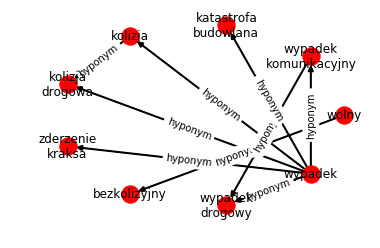

In [154]:
synsets = { wn.lookUpSense(word[0], word[1], word[2]) for word in [
                                                            ('wypadek', 1, 'n'), 
                                                            ('wypadek komunikacyjny', 1, 'n'), 
                                                            ('kolizja', 2, 'n'), 
                                                            ('kolizja drogowa', 1, 'n'), 
                                                            ('katastrofa budowlana', 1, 'n'), 
                                                            ('wypadek drogowy', 1, 'n') ,
                                                            ('zderzenie', 2, 'n'), 
                                                            ('bezkolizyjny', 2, 'a'), 
                                                            ('wolny', 13, 'a'), 
]}
for synset in synsets:
    write_synset(synset, sys.stdout)
plot_relations(synsets)

In [169]:
def distance(synset1, synset2):
    print(wn.simLeaCho(synset1.wnid, synset2.wnid, 'n', 'hyponym', True))

In [170]:
synset1 = wn.lookUpSense('szkoda', 2, 'n')
synset2 = wn.lookUpSense('wypadek', 1, 'n')
distance(synset1, synset2)

1.146128035678238


In [171]:
synset1 = wn.lookUpSense('kolizja', 2, 'n')
synset2 = wn.lookUpSense('szkoda majątkowa', 1, 'n')
distance(synset1, synset2)

1.2430380486862944


In [172]:
synset1 = wn.lookUpSense('nieszczęście', 2, 'n')
synset2 = wn.lookUpSense('katastrofa budowlana', 1, 'n')
distance(synset1, synset2)


1.2430380486862944
